# Prioritised Replay Noisy Duelling Double Deep Q Learning - A simple ambulance dispatch point allocation model
Double Deep Q Learning - A simple ambulance dispatch point allocation model

## Reinforcement learning introduction

### RL involves:
* Trial and error search
* Receiving and maximising reward (often delayed)
* Linking state -> action -> reward
* Must be able to sense something of their environment
* Involves uncertainty in sensing and linking action to reward
* Learning -> improved choice of actions over time
* All models find a way to balance best predicted action vs. exploration

### Elements of RL
* *Environment*: all observable and unobservable information relevant to us
* *Observation*: sensing the environment
* *State*: the perceived (or perceivable) environment
* *Agent*: senses environment, decides on action, receives and monitors rewards
* *Action*: may be discrete (e.g. turn left) or continuous (accelerator pedal)
* *Policy* (how to link state to action; often based on probabilities)
* *Reward signal*: aim is to accumulate maximum reward over time
* *Value function* of a state: prediction of likely/possible long-term reward
* *Q*: prediction of likely/possible long-term reward of an *action*
* *Advantage*: The difference in Q between actions in a given state (sums to zero for all actions)
* *Model* (optional): a simulation of the environment

### Types of model

* *Model-based*: have model of environment (e.g. a board game)
* *Model-free*: used when environment not fully known
* *Policy-based*: identify best policy directly
* *Value-based*: estimate value of a decision
* *Off-policy*: can learn from historic data from other agent
* *On-policy*: requires active learning from current decisions


## Duelling Deep Q Networks for Reinforcement Learning

Q = The expected future rewards discounted over time. This is what we are trying to maximise.

The aim is to teach a network to take the current state observations and recommend the action with greatest Q.

Duelling is very similar to Double DQN, except that the policy net splits into two. One component reduces to a single value, which will model the state *value*. The other component models the *advantage*, the difference in Q between different actions (the mean value is subtracted from all values, so that the advtantage always sums to zero). These are aggregated to produce Q for each action.

<img src="./images/duelling_dqn.png" width="500"/>

Q is learned through the Bellman equation, where the Q of any state and action is the immediate reward achieved + the discounted maximum Q value (the best action taken) of next best action, where gamma is the discount rate.

$$Q(s,a)=r + \gamma.maxQ(s',a')$$

## Key DQN components

<img src="./images/dqn_components.png" width="700"/>


## General method for Q learning:

Overall aim is to create a neural network that predicts Q. Improvement comes from improved accuracy in predicting 'current' understood Q, and in revealing more about Q as knowledge is gained (some rewards only discovered after time).

<img src="./images/dqn_process.png" width="600|"/>
    
Target networks are used to stabilise models, and are only updated at intervals. Changes to Q values may lead to changes in closely related states (i.e. states close to the one we are in at the time) and as the network tries to correct for errors it can become unstable and suddenly lose signficiant performance. Target networks (e.g. to assess Q) are updated only infrequently (or gradually), so do not have this instability problem.

## Training networks

Double DQN contains two networks. This ammendment, from simple DQN, is to decouple training of Q for current state and target Q derived from next state which are closely correlated when comparing input features.

The *policy network* is used to select action (action with best predicted Q) when playing the game.

When training, the predicted best *action* (best predicted Q) is taken from the *policy network*, but the *policy network* is updated using the predicted Q value of the next state from the *target network* (which is updated from the policy network less frequently). So, when training, the action is selected using Q values from the *policy network*, but the the *policy network* is updated to better predict the Q value of that action from the *target network*. The *policy network* is copied across to the *target network* every *n* steps (e.g. 1000).

<img src="./images/dqn_training.png" width="700|"/>

## Noisy layers
Noisy layers are an alternative to epsilon-greedy exploration (here, we leave the epsilon-greedy code in the model, but set it to reduce to zero immediately after the period of fully random action choice).

For every weight in the layer we have a random value that we draw from the normal distribution. This random value is used to add noise to the output. The parameters for the extent of noise for each weight, sigma, are stored within the layer and get trained as part of the standard back-propogation.

A modification to normal nosiy layers is to use layers with ‘factorized gaussian noise’. This reduces the number of random numbers to be sampled (so is less computationally expensive). There are two random vectors, one with the size of the input, and the other with the size of the output. A random matrix is created by calculating the outer product of the two vectors.

## Prioritised replay

In standard DQN samples are taken randomly from the memory (replay buffer). In *prioritised replay* samples are taken in proportion to their loss when training the network; where the network has the greatest error in predicting the target valur of a state/action, then those samples will be sampled more frequently (which will reduce the error in the network until the sample is not prioritised). In other words, the training focuses more heavenly on samples it gets most wrong, and spends less time training on samples that it can acurately predict already.

This priority may also be used as a weight for training the network, but this i snot implemented here; we use loss just for sampling.

When we use the loss for priority we add a small value (1e-5) t the loss. This avoids any sample having zero priority (and never having a chance of being sampled). For frequency of sampling we also raise the loss to the power of 'alpha' (default value of 0.6). Smaller values of alpha will compress the differences between samples, making the priority weighting less significant in the frequency of sampling.

## References

Double DQN:
van Hasselt H, Guez A, Silver D. (2015) Deep Reinforcement Learning with Double Q-learning. arXiv:150906461 http://arxiv.org/abs/1509.06461

Duelling DDQN:
Wang Z, Schaul T, Hessel M, et al. (2016) Dueling Network Architectures for Deep Reinforcement Learning. arXiv:151106581 http://arxiv.org/abs/1511.06581

Noisy networks:
Fortunato M, Azar MG, Piot B, et al. (2019) Noisy Networks for Exploration. arXiv:170610295 http://arxiv.org/abs/1706.10295

Prioritised replay:
Schaul T, Quan J, Antonoglou I, et al (2016). Prioritized Experience Replay. arXiv:151105952 http://arxiv.org/abs/1511.05952

Code for the nosiy layers comes from:

Lapan, M. (2020). Deep Reinforcement Learning Hands-On: Apply modern RL methods to practical problems of chatbots, robotics, discrete optimization, web automation, and more, 2nd Edition. Packt Publishing.

## Code structure

<img src="./images/dqn_program_structure.png" width="700|"/>

In [1]:
pip install simpy

In [2]:
# Import the library to mount Google Drive
from google.colab import drive
# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

# Verify by listing the files in the drive
!ls /content/drive/My\ Drive/

import sys
sys.path.append('/content/drive/MyDrive/IntelligenzaArtificiale/qambo-main')


Mounted at /content/drive
 0512110799-Napolitano-Margherita-Maria.pdf  'Copia di Use case model.drawio'
 09_category_partition_30_11_2022.gdoc	      delega-accettazione-eventuale-supplenza-al-ds.doc
 2020.06.10.20127183v2.full.pdf		      DiagrammaNavigazionale2.drawio
'ANALISI DEL DATASET.gdoc'		     'Documento senza titolo.gdoc'
 biometria				      IntelligenzaArtificiale
'Colab Notebooks'			     'L-31 INFORMATICA'


In [3]:
################################################################################
#                           1 Import packages                                  #
################################################################################

from amboworld.environment import Env

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F

# Use a double ended queue (deque) for memory
# When memory is full, this will replace the oldest value with the new one
from collections import deque

# Supress all warnings (e.g. deprecation warnings) for regular use
import warnings

warnings.filterwarnings("ignore")

In [4]:
################################################################################
#                           2 Define model parameters                          #
################################################################################

# Set whether to display on screen (slows model)
DISPLAY_ON_SCREEN = False
# Discount rate of future rewards
GAMMA = 0.99
# Learing rate for neural network
LEARNING_RATE = 0.003
# Maximum number of game steps (state, action, reward, next state) to keep
MEMORY_SIZE = 10000000
# Sample batch size for policy network update
BATCH_SIZE = 5
# Number of game steps to play before starting training (all random actions)
REPLAY_START_SIZE = 50000
# Number of steps between policy -> target network update
SYNC_TARGET_STEPS = 1000
# Exploration rate (epsilon) is probability of choosing a random action
EXPLORATION_MAX = 1.0
EXPLORATION_MIN = 0.0
# Reduction in epsilon with each game step
EXPLORATION_DECAY = 0.0
# Training episodes
TRAINING_EPISODES = 50
# Save results
RESULTS_NAME = 'pr_noisy_d3qn'

# SIM PARAMETERS
RANDOM_SEED = 42
SIM_DURATION = 5000
NUMBER_AMBULANCES = 9
NUMBER_INCIDENT_POINTS = 3
INCIDENT_RADIUS = 2
NUMBER_DISPTACH_POINTS = 25
AMBOWORLD_SIZE = 50
INCIDENT_INTERVAL = 20
EPOCHS = 2
AMBO_SPEED = 60
AMBO_FREE_FROM_HOSPITAL = False

In [5]:
################################################################################
#                 3 Define DQN (Duelling Deep Q Network) class                 #
#                    (Used for both policy and target nets)                    #
################################################################################

"""
Code for nosiy layers comes from:

Lapan, M. (2020). Deep Reinforcement Learning Hands-On: Apply modern RL methods
to practical problems of chatbots, robotics, discrete optimization,
web automation, and more, 2nd Edition. Packt Publishing.
"""


class NoisyLinear(nn.Linear):
    """
    Noisy layer for network.

    For every weight in the layer we have a random value that we draw from the
    normal distribution.Paraemters for the noise, sigma, are stored within the
    layer and get trained as part of the standard back-propogation.

    'register_buffer' is used to create tensors in the network that are not
    updated during back-propogation. They are used to create normal
    distributions to add noise (multiplied by sigma which is a paramater in the
    network).
    """

    def __init__(self, in_features, out_features,
                 sigma_init=0.017, bias=True):
        super(NoisyLinear, self).__init__(
            in_features, out_features, bias=bias)
        w = torch.full((out_features, in_features), sigma_init)
        self.sigma_weight = nn.Parameter(w)
        z = torch.zeros(out_features, in_features)
        self.register_buffer("epsilon_weight", z)
        if bias:
            w = torch.full((out_features,), sigma_init)
            self.sigma_bias = nn.Parameter(w)
            z = torch.zeros(out_features)
            self.register_buffer("epsilon_bias", z)
        self.reset_parameters()

    def reset_parameters(self):
        std = math.sqrt(3 / self.in_features)
        self.weight.data.uniform_(-std, std)
        self.bias.data.uniform_(-std, std)

    def forward(self, input):
        self.epsilon_weight.normal_()
        bias = self.bias
        if bias is not None:
            self.epsilon_bias.normal_()
            bias = bias + self.sigma_bias * \
                   self.epsilon_bias.data
        v = self.sigma_weight * self.epsilon_weight.data + self.weight
        return F.linear(input, v, bias)


class NoisyFactorizedLinear(nn.Linear):
    """
    NoisyNet layer with factorized gaussian noise. This reduces the number of
    random numbers to be sampled (so less computationally expensive). There are
    two random vectors. One with the size of the input, and the other with the
    size of the output. A random matrix is create by calculating the outer
    product of the two vectors.

    'register_buffer' is used to create tensors in the network that are not
    updated during back-propogation. They are used to create normal
    distributions to add noise (multiplied by sigma which is a paramater in the
    network).
    """
    def __init__(self, in_features, out_features,
                 sigma_zero=0.4, bias=True):
        super(NoisyFactorizedLinear, self).__init__(
            in_features, out_features, bias=bias)
        sigma_init = sigma_zero / math.sqrt(in_features)
        w = torch.full((out_features, in_features), sigma_init)
        self.sigma_weight = nn.Parameter(w)
        z1 = torch.zeros(1, in_features)
        self.register_buffer("epsilon_input", z1)
        z2 = torch.zeros(out_features, 1)
        self.register_buffer("epsilon_output", z2)
        if bias:
            w = torch.full((out_features,), sigma_init)
            self.sigma_bias = nn.Parameter(w)

    def forward(self, input):
        self.epsilon_input.normal_()
        self.epsilon_output.normal_()

        func = lambda x: torch.sign(x) * torch.sqrt(torch.abs(x))
        eps_in = func(self.epsilon_input.data)
        eps_out = func(self.epsilon_output.data)

        bias = self.bias
        if bias is not None:
            bias = bias + self.sigma_bias * eps_out.t()
        noise_v = torch.mul(eps_in, eps_out)
        v = self.weight + self.sigma_weight * noise_v
        return F.linear(input, v, bias)

class DQN(nn.Module):

    """Deep Q Network. Udes for both policy (action) and target (Q) networks."""

    def __init__(self, observation_space, action_space):
        """Constructor method. Set up neural nets."""

        # nerurones per hidden layer = 2 * max of observations or actions
        neurons_per_layer = 2 * max(observation_space, action_space)

        # Set starting exploration rate
        self.exploration_rate = EXPLORATION_MAX

        # Set up action space (choice of possible actions)
        self.action_space = action_space


        # First layerswill be common to both Advantage and value
        super(DQN, self).__init__()
        self.feature = nn.Sequential(
            nn.Linear(observation_space, neurons_per_layer),
            nn.ReLU()
            )

        # Advantage has same number of outputs as the action space
        self.advantage = nn.Sequential(
            NoisyFactorizedLinear(neurons_per_layer, neurons_per_layer),
            nn.ReLU(),
            NoisyFactorizedLinear(neurons_per_layer, action_space)
            )

        # State value has only one output (one value per state)
        self.value = nn.Sequential(
            nn.Linear(neurons_per_layer, neurons_per_layer),
            nn.ReLU(),
            nn.Linear(neurons_per_layer, 1)
            )

    def act(self, state):
        """Act either randomly or by redicting action that gives max Q"""

        # Act randomly if random number < exploration rate
        if np.random.rand() < self.exploration_rate:
            action = random.randrange(self.action_space)

        else:
            # Otherwise get predicted Q values of actions
            q_values = self.forward(torch.FloatTensor(state))
            # Get index of action with best Q
            action = np.argmax(q_values.detach().numpy()[0])

        return  action


    def forward(self, x):
        x = self.feature(x)
        advantage = self.advantage(x)
        value = self.value(x)
        action_q = value + advantage - advantage.mean()
        return action_q

In [6]:
################################################################################
#                    4 Define policy net training function                     #
################################################################################

def optimize(policy_net, target_net, memory):
    """
    Update  model by sampling from memory.
    Uses policy network to predict best action (best Q).
    Uses target network to provide target of Q for the selected next action.
    """

    # Do not try to train model if memory is less than reqired batch size
    if len(memory) < BATCH_SIZE:
        return

    # Reduce exploration rate (exploration rate is stored in policy net)
    policy_net.exploration_rate *= EXPLORATION_DECAY
    policy_net.exploration_rate = max(EXPLORATION_MIN,
                                      policy_net.exploration_rate)
    # Sample a random batch from memory
    batch = memory.sample(BATCH_SIZE)

    for state, action, reward, state_next, terminal, index in batch:

        state_action_values = policy_net(torch.FloatTensor(state))

        # Get target Q for policy net update

        if not terminal:
            # For non-terminal actions get Q from policy net
            expected_state_action_values = policy_net(torch.FloatTensor(state))
            # Detach next state values from gradients to prevent updates
            expected_state_action_values = expected_state_action_values.detach()
            # Get next state action with best Q from the policy net (double DQN)
            policy_next_state_values = policy_net(torch.FloatTensor(state_next))
            policy_next_state_values = policy_next_state_values.detach()
            best_action = np.argmax(policy_next_state_values[0].numpy())
            # Get target net next state
            next_state_action_values = target_net(torch.FloatTensor(state_next))
            # Use detach again to prevent target net gradients being updated
            next_state_action_values = next_state_action_values.detach()
            best_next_q = next_state_action_values[0][best_action].numpy()
            updated_q = reward + (GAMMA * best_next_q)
            expected_state_action_values[0][action] = updated_q
        else:
            # For termal actions Q = reward (-1)
            expected_state_action_values = policy_net(torch.FloatTensor(state))
            # Detach values from gradients to prevent gradient update
            expected_state_action_values = expected_state_action_values.detach()
            # Set Q for all actions to reward (-1)
            expected_state_action_values[0] = reward

        # Set net to training mode
        policy_net.train()
        # Reset net gradients
        policy_net.optimizer.zero_grad()
        # calculate loss
        loss_v = nn.MSELoss()(state_action_values, expected_state_action_values)
        # Backpropogate loss
        loss_v.backward()
        # Update replay buffer (add 1e-5 to loss to avoid zero priority with no
        # chance of being sampled).
        loss_numpy = loss_v.data.numpy()
        memory.update_priorities(index, loss_numpy + 1e-5)
        # Update network gradients
        policy_net.optimizer.step()

    return

In [7]:
################################################################################
#                  5 Define prioritised replay memory class                    #
################################################################################


class NaivePrioritizedBuffer():
    """
    Based on code from https://github.com/higgsfield/RL-Adventure

    Each sample (state, action, reward, next_state, done) has an associated
    priority, which is the loss from training the policy network. The priority
    is used to adjust the frequency of sampling.
    """

    def __init__(self, capacity=MEMORY_SIZE, prob_alpha=0.6):
        self.prob_alpha = prob_alpha
        self.capacity = capacity
        self.buffer = []
        self.pos = 0
        self.priorities = np.zeros((capacity,), dtype=np.float32)

    def remember(self, state, action, reward, next_state, done):
        """
        Add sample (state, action, reward, next_state, done) to memory, or
        replace oldest sample if memory full"""

        max_prio = self.priorities.max() if self.buffer else 1.0

        if len(self.buffer) < self.capacity:
            # Add new sample when room in memory
            self.buffer.append((state, action, reward, next_state, done))
        else:
            # Replace sample when memory full
            self.buffer[self.pos] = (state, action, reward, next_state, done)

        # Set maximum priority present
        self.priorities[self.pos] = max_prio
        # Increment replacement position
        self.pos = (self.pos + 1) % self.capacity

    def sample(self, batch_size, beta=0.4):
        # Get priorities
        if len(self.buffer) == self.capacity:
            prios = self.priorities
        else:
            prios = self.priorities[:self.pos]

        # Raise priorities by the square of 'alpha'
        # (lower alpha compresses differences)
        probs  = prios ** self.prob_alpha

        # Normlaise priorities
        probs /= probs.sum()

        # Sample using priorities for relative sampling frequency
        indices = np.random.choice(len(self.buffer), batch_size, p=probs)
        samples = [self.buffer[idx] for idx in indices]

        # Add index to sample (used to update priority after getting new loss)
        batch = []
        for index, sample in enumerate(samples):
            sample = list(sample)
            sample.append(indices[index])
            batch.append(sample)

        return batch

    def update_priorities(self, index, priority):
        """Update sample priority with new loss"""
        self.priorities[index] = priority

    def __len__(self):
        return len(self.buffer)

In [8]:
################################################################################
#                       6  Define results plotting function                    #
################################################################################

def plot_results(run, exploration, score, mean_call_to_arrival,
                 mean_assignment_to_arrival):
    """Plot and report results at end of run"""

    # Set up chart (ax1 and ax2 share x-axis to combine two plots on one graph)
    fig = plt.figure(figsize=(6,6))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    # Plot results
    lns1 = ax1.plot(
        run, exploration, label='exploration', color='g', linestyle=':')

    lns2 = ax2.plot(run, mean_call_to_arrival,
             label='call to arrival', color='r')
    lns3 = ax2.plot(run, mean_assignment_to_arrival,
             label='assignment to arrival', color='b', linestyle='--')

    # Get combined legend
    lns = lns1 + lns2 + lns3
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

    # Set axes
    ax1.set_xlabel('run')
    ax1.set_ylabel('exploration')
    ax2.set_ylabel('Response time')
    filename = '/content/drive/MyDrive/IntelligenzaArtificiale/qambo-main/3Incidents/new_output/' + RESULTS_NAME +'.png'
    plt.savefig(filename, dpi=300)
    plt.show()

In [9]:
################################################################################
#                                 7 Main program                               #
################################################################################

def qambo():
    """Main program loop"""

    ############################################################################
    #                          8 Set up environment                            #
    ############################################################################

    # Set up game environemnt
    sim = Env(
        random_seed = RANDOM_SEED,
        duration_incidents = SIM_DURATION,
        number_ambulances = NUMBER_AMBULANCES,
        number_incident_points = NUMBER_INCIDENT_POINTS,
        incident_interval = INCIDENT_INTERVAL,
        number_epochs = EPOCHS,
        number_dispatch_points = NUMBER_DISPTACH_POINTS,
        incident_range = INCIDENT_RADIUS,
        max_size = AMBOWORLD_SIZE,
        ambo_kph = AMBO_SPEED,
        ambo_free_from_hospital = AMBO_FREE_FROM_HOSPITAL
    )

    # Get number of observations returned for state
    observation_space = sim.observation_size

    # Get number of actions possible
    action_space = sim.action_number

    ############################################################################
    #                    9 Set up policy and target nets                       #
    ############################################################################

    # Set up policy and target neural nets (and keep best net performance)
    policy_net = DQN(observation_space, action_space)
    target_net = DQN(observation_space, action_space)
    best_net = DQN(observation_space, action_space)

    # Set loss function and optimizer
    policy_net.optimizer = optim.Adam(
            params=policy_net.parameters(), lr=LEARNING_RATE)

    # Copy weights from policy_net to target
    target_net.load_state_dict(policy_net.state_dict())

    # Set target net to eval rather than training mode
    # We do not train target net - ot is copied from policy net at intervals
    target_net.eval()

    ############################################################################
    #                            10 Set up memory                              #
    ############################################################################

    # Set up memomry
    memory = NaivePrioritizedBuffer()

    ############################################################################
    #                     11 Set up + start training loop                      #
    ############################################################################

    # Set up run counter and learning loop
    run = 0
    all_steps = 0
    continue_learning = True
    best_reward = -np.inf

    # Set up list for results
    results_run = []
    results_exploration = []
    results_score = []
    results_mean_call_to_arrival = []
    results_mean_assignment_to_arrival = []

    # Continue repeating games (episodes) until target complete
    while continue_learning:

        ########################################################################
        #                           12 Play episode                            #
        ########################################################################

        # Increment run (episode) counter
        run += 1

        ########################################################################
        #                             13 Reset game                            #
        ########################################################################

        # Reset game environment and get first state observations
        state = sim.reset()

        # Reset total reward and rewards list
        total_reward = 0
        rewards = []

        # Reshape state into 2D array with state obsverations as first 'row'
        state = np.reshape(state, [1, observation_space])

        # Continue loop until episode complete
        while True:

            ####################################################################
            #                       14 Game episode loop                       #
            ####################################################################

            ####################################################################
            #                       15 Get action                              #
            ####################################################################

            # Get action to take (se eval mode to avoid dropout layers)
            policy_net.eval()
            action = policy_net.act(state)

            ####################################################################
            #                 16 Play action (get S', R, T)                    #
            ####################################################################

            # Act
            state_next, reward, terminal, info = sim.step(action)
            total_reward += reward

            # Update trackers
            rewards.append(reward)

            # Reshape state into 2D array with state observations as first 'row'
            state_next = np.reshape(state_next, [1, observation_space])

            # Update display if needed
            if DISPLAY_ON_SCREEN:
                sim.render()

            ####################################################################
            #                  17 Add S/A/R/S/T to memory                      #
            ####################################################################

            # Record state, action, reward, new state & terminal
            memory.remember(state, action, reward, state_next, terminal)

            # Update state
            state = state_next

            ####################################################################
            #                  18 Check for end of episode                     #
            ####################################################################

            # Actions to take if end of game episode
            if terminal:
                # Get exploration rate
                exploration = policy_net.exploration_rate
                # Clear print row content
                clear_row = '\r' + ' ' * 79 + '\r'
                print(clear_row, end='')
                print(f'Run: {run}, ', end='')
                print(f'Exploration: {exploration: .3f}, ', end='')
                average_reward = np.mean(rewards)
                print(f'Average reward: {average_reward:4.1f}, ', end='')
                mean_assignment_to_arrival = np.mean(info['assignment_to_arrival'])
                print(f'Mean assignment to arrival: {mean_assignment_to_arrival:4.1f}, ', end='')
                mean_call_to_arrival = np.mean(info['call_to_arrival'])
                print(f'Mean call to arrival: {mean_call_to_arrival:4.1f}, ', end='')
                demand_met = info['fraction_demand_met']
                print(f'Demand met {demand_met:0.3f}')

                # Add to results lists
                results_run.append(run)
                results_exploration.append(exploration)
                results_score.append(total_reward)
                results_mean_call_to_arrival.append(mean_call_to_arrival)
                results_mean_assignment_to_arrival.append(mean_assignment_to_arrival)

                # Save model if best reward
                total_reward = np.sum(rewards)
                if total_reward > best_reward:
                    best_reward = total_reward
                    # Copy weights to best net
                    best_net.load_state_dict(policy_net.state_dict())

                ################################################################
                #             18b Check for end of learning                    #
                ################################################################

                if run == TRAINING_EPISODES:
                    continue_learning = False

                # End episode loop
                break

            ####################################################################
            #                        19 Update policy net                      #
            ####################################################################

            # Avoid training model if memory is not of sufficient length
            if len(memory) > REPLAY_START_SIZE:

                # Update policy net
                optimize(policy_net, target_net, memory)

                ################################################################
                #             20 Update target net periodically                #
                ################################################################

                # Use load_state_dict method to copy weights from policy net
                if all_steps % SYNC_TARGET_STEPS == 0:
                    target_net.load_state_dict(policy_net.state_dict())

    ############################################################################
    #             21 Learning complete - plot and save results                 #
    ############################################################################

    # Target reached. Plot results
    plot_results(results_run, results_exploration, results_score,
                 results_mean_call_to_arrival, results_mean_assignment_to_arrival)

    # SAVE RESULTS
    run_details = pd.DataFrame()
    run_details['run'] = results_run
    run_details['exploration '] = results_exploration
    run_details['mean_call_to_arrival'] = results_mean_call_to_arrival
    run_details['mean_assignment_to_arrival'] = results_mean_assignment_to_arrival
    filename = '/content/drive/MyDrive/IntelligenzaArtificiale/qambo-main/3Incidents/new_output/' + RESULTS_NAME + '.csv'
    run_details.to_csv(filename, index=False)

    ############################################################################
    #                             Test best model                              #
    ############################################################################

    print()
    print('Test Model')
    print('----------')

    best_net.exploration_rate = 0
    best_net.eval()

    # Set up results dictionary
    results = dict()
    results['call_to_arrival'] = []
    results['assign_to_arrival'] = []
    results['demand_met'] = []

    # Replicate model runs
    for run in range(30):

        # Reset game environment and get first state observations
        state = sim.reset()
        state = np.reshape(state, [1, observation_space])

        # Continue loop until episode complete
        while True:
            # Get action to take (se eval mode to avoid dropout layers)
            best_net.eval()
            action = best_net.act(state)
            # Act
            state_next, reward, terminal, info = sim.step(action)
            # Reshape state into 2D array with state observations as first 'row'
            state_next = np.reshape(state_next, [1, observation_space])
            # Update state
            state = state_next
            if terminal:
                print(f'Run: {run}, ', end='')
                mean_assignment_to_arrival = np.mean(info['assignment_to_arrival'])
                print(f'Mean assignment to arrival: {mean_assignment_to_arrival:4.1f}, ', end='')
                mean_call_to_arrival = np.mean(info['call_to_arrival'])
                print(f'Mean call to arrival: {mean_call_to_arrival:4.1f}, ', end='')
                demand_met = info['fraction_demand_met']
                print(f'Demand met: {demand_met:0.3f}')

                # Add to results
                results['call_to_arrival'].append(mean_call_to_arrival)
                results['assign_to_arrival'].append(mean_assignment_to_arrival)
                results['demand_met'].append(demand_met)

                # End episode loop
                break

    results = pd.DataFrame(results)
    filename = '/content/drive/MyDrive/IntelligenzaArtificiale/qambo-main/3Incidents/new_output/results_' + RESULTS_NAME +'.csv'
    results.to_csv(filename, index=False)
    print()
    print(results.describe())

    return run_details

Run: 1, Exploration:  1.000, Average reward: -456.4, Mean assignment to arrival: 18.7, Mean call to arrival: 19.2, Demand met 1.000
Run: 2, Exploration:  1.000, Average reward: -467.6, Mean assignment to arrival: 19.0, Mean call to arrival: 19.6, Demand met 1.000
Run: 3, Exploration:  1.000, Average reward: -448.8, Mean assignment to arrival: 18.5, Mean call to arrival: 19.1, Demand met 1.000
Run: 4, Exploration:  1.000, Average reward: -463.5, Mean assignment to arrival: 18.9, Mean call to arrival: 19.4, Demand met 1.000
Run: 5, Exploration:  1.000, Average reward: -449.5, Mean assignment to arrival: 18.6, Mean call to arrival: 19.1, Demand met 1.000
Run: 6, Exploration:  1.000, Average reward: -457.5, Mean assignment to arrival: 18.8, Mean call to arrival: 19.3, Demand met 1.000
Run: 7, Exploration:  1.000, Average reward: -446.4, Mean assignment to arrival: 18.5, Mean call to arrival: 19.0, Demand met 1.000
Run: 8, Exploration:  1.000, Average reward: -448.3, Mean assignment to arri

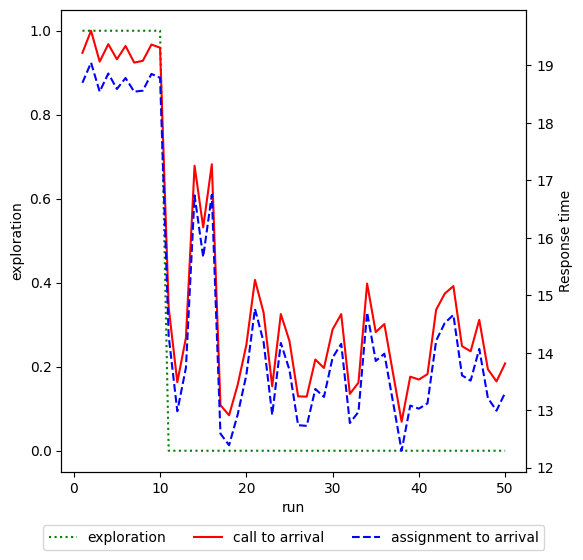


Test Model
----------
Run: 0, Mean assignment to arrival: 11.9, Mean call to arrival: 12.4, Demand met: 1.000
Run: 1, Mean assignment to arrival: 11.8, Mean call to arrival: 12.3, Demand met: 1.000
Run: 2, Mean assignment to arrival: 11.9, Mean call to arrival: 12.4, Demand met: 1.000
Run: 3, Mean assignment to arrival: 12.5, Mean call to arrival: 13.0, Demand met: 1.000
Run: 4, Mean assignment to arrival: 12.0, Mean call to arrival: 12.5, Demand met: 1.000
Run: 5, Mean assignment to arrival: 12.0, Mean call to arrival: 12.5, Demand met: 1.000
Run: 6, Mean assignment to arrival: 11.9, Mean call to arrival: 12.4, Demand met: 1.000
Run: 7, Mean assignment to arrival: 12.1, Mean call to arrival: 12.6, Demand met: 1.000
Run: 8, Mean assignment to arrival: 11.9, Mean call to arrival: 12.4, Demand met: 1.000
Run: 9, Mean assignment to arrival: 11.9, Mean call to arrival: 12.4, Demand met: 1.000
Run: 10, Mean assignment to arrival: 11.8, Mean call to arrival: 12.3, Demand met: 0.999
Run: 11,

In [10]:
######################## MODEL ENTRY POINT #####################################

# Run model and return last run results
last_run = qambo()